# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-13 17:49:57.581958: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-13 17:49:57.582174: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 17:49:57.584207: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 17:49:57.610327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 17:49:58.143689: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 6000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 10.350%
Epoch 2/5: accuracy 10.450%
Epoch 3/5: accuracy 10.450%
Epoch 4/5: accuracy 10.450%
Epoch 5/5: accuracy 10.450%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-8 -8 -8 ... -8 -8 -8]
 [-8 -8 -8 ... -8 -8 -8]] ...

 [[-8 -8 -8 ... -8 -8 -8]
 [-8 -8 -8 ... -8 -8 -8]
 [-8 -8 -8 ... -8 -8 -8]
 ...
 [-8 -8 -8 ... -8 -8 -8]
 [-8 -8 -8 ... -8 -8 -8]
 [-8 -8 -8 ... -8 -8 -8]]

 [[-8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8]
 [-8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 -8
  -8 -8 -8 -8 -8


 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


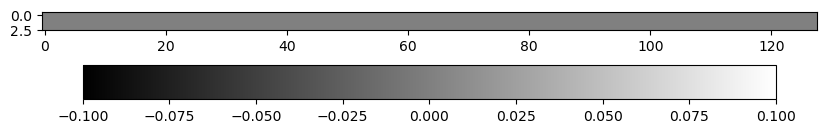


 [0 0 0 0 0 0 0 0 0 0]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
plt.show()
print("\n", model.last_outputs)